In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from calculations.calculations import get_company_name
from datetime import timedelta

In [32]:
stock = yf.download('^SPX', period='1mo', interval='1h')
data = stock.tz_convert('CET')

[*********************100%%**********************]  1 of 1 completed


In [33]:
# Paso 2: Crear un listado completo de fechas
start_date = data.index[0]
print(start_date)
end_date = data.index[-1]
print(end_date)

2024-06-20 15:30:00+02:00
2024-07-19 21:30:00+02:00


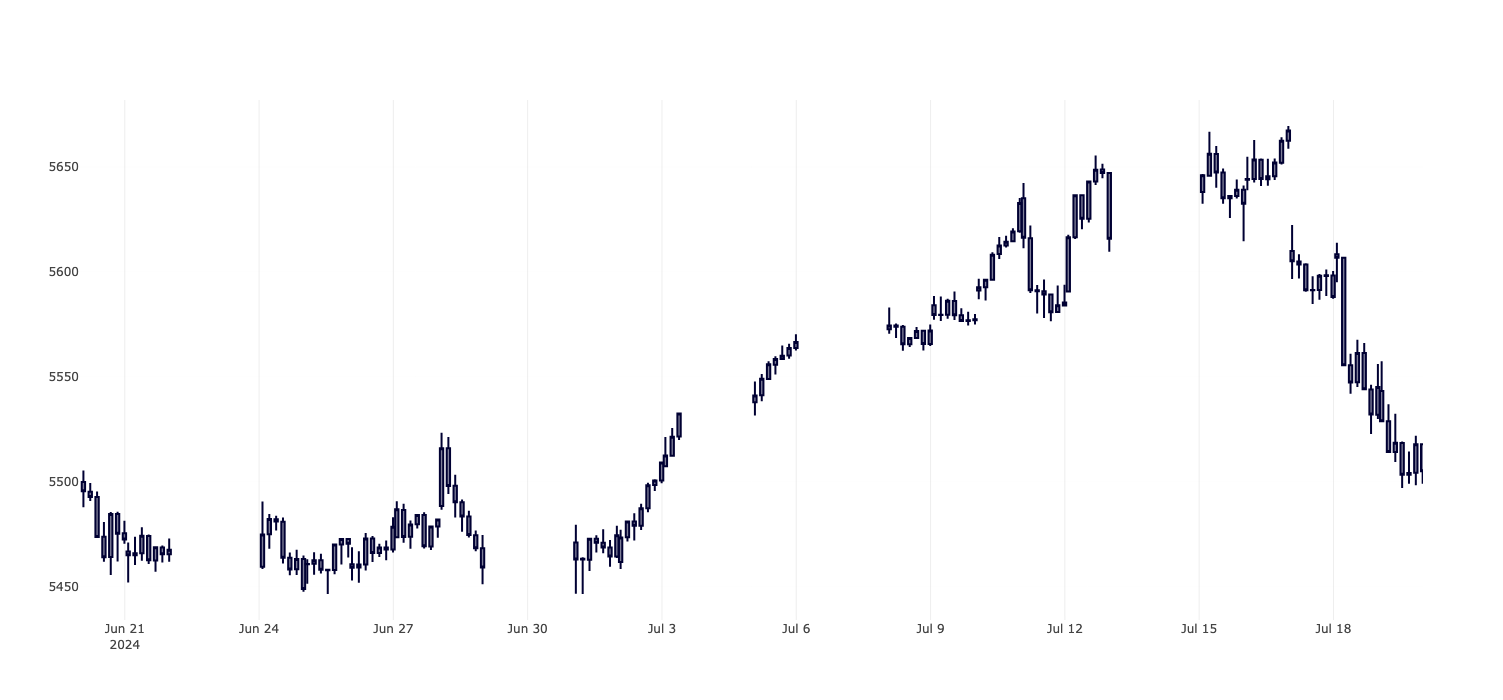

In [35]:
# Paso 4: Crear el gráfico de Plotly
fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])

# Actualizar el eje x para eliminar los gaps de fechas faltantes
#fig.update_xaxes(
##    rangebreaks=[dict(bounds=["sat", "sun"]),
#                dict(bounds=[22, 14], pattern="hour")
#                ]
#)

# Actualizar el eje x para eliminar los gaps de fechas faltantes
fig.update_xaxes(
    rangebreaks=[
                dict(bounds=[21.55, 15], pattern="hour")
                ]
)

fig.update_layout(xaxis_title='', yaxis_title='',
                  yaxis=dict(
                            gridcolor='rgba(200, 200, 200, 0.03)',
                            gridwidth=1
                    ),
                  xaxis_rangeslider_visible=False,
                  height=700,
                  dragmode='drawline',
                  shapes=[],
                  newshape=dict(line=dict(color="red")),
                  modebar_add=['drawline','eraseshape'],
                  showlegend=False)

# Mostrar el gráfico
fig.show()